In [1]:
from ipywidgets import *
from PIL import Image, ImageDraw, ImageEnhance, ImageColor
import numpy as np
import matplotlib.pyplot as plt
import math


# Slider

this function creates a slider to allow number of iterations of the fractal to be adjusted. The minimum value is set to 0 with a specific case in the koch_shape function for that. The maximum value is set to 10, however due to the plot the level of detail within the fractal starts to become to finite.

In [4]:
def update(iterations):

    iterations=iterations

iterations = widgets.IntSlider(min = 0, max = 10,step = 1,value=0)
interact(update,iterations=iterations,value=True)

interactive(children=(IntSlider(value=0, description='iterations', max=10), Output()), _dom_classes=('widget-i…

<function __main__.update>

# Koch shape

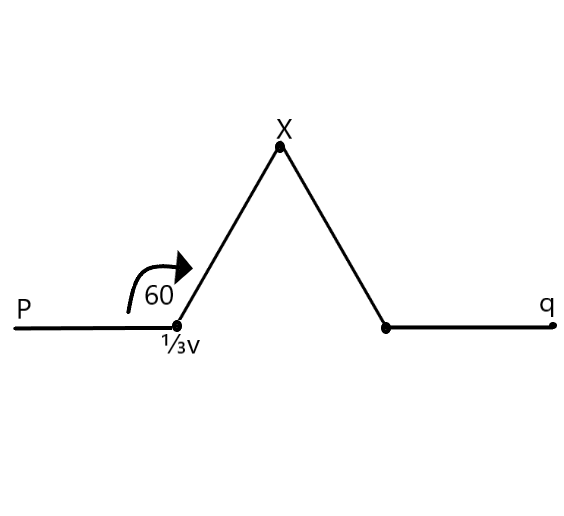

This function firstly, defines a case for if the number of iteration is set to 0. If this happens then an  equilateral triangle is plotted.
To allow the Koch snowflake to be constructed the inital shape must be broken down into 3 sperate line segments that are equidistant.
These line segments are formed from points p,x and q.
Point x which does not lie on the line 'v' and can be found by using the rotation matrix 'R_60'.
the matrix is formed using the library 'math, this allows sin and cos to be used to give more precise answers in the matrix.
This rotates the point it is multiplied by 60° anti-clockwise.
therefore by multiplying ⅓v by the rotation matrix and adding it to (⅓v+p), a point 'x' is fromed mid way between points p and q with an angle of 60° anit-clockwise.

next, the three line segments are defined, these are;

    p+⅓v to x,
    x to p+⅔v,
    p+⅔v to q.

In [14]:
def koch_shape(p, q, n):
    if n==0:
        plt.plot([p[0,0],q[0,0]],[p[1,0],q[1,0]],'k-') #case for n=0, equilateral triangle,plotted in black solid line 
    else:
        
        v=q-p 
        koch_shape(p, p+v/3,n-1) 
        
        R_60= np.matrix([[math.cos(math.pi/3),-math.sin(math.pi/3)], #rotation matrix to rotate vectors counterclockwise 60 degrees
                         [math.sin(math.pi/3),math.cos(math.pi/3)]])
        #print(p,q,R_60)
        x = p + v/3+R_60* v/3
        #print(x)
        koch_shape(p+v/3,x,n-1) #line 1
        koch_shape(x,p+2*v/3,n-1) #line 2
        koch_shape(p+2*v/3,q,n-1) #line 3

# Snowflake

here the arrays are set. This allows the snowflake shape to from as each point is and then plotted in a following order and with the the inclusion of the rotation matrix, each iteration causes a rotation of 60° anti-clockwise. When the line segments have each been plotted 'n-1' times the points will have joined.


In [12]:
def koch_snowflake(n):
    p= np.array([[0],[0]]) #starting of p array
    q= np.array([[1],[0]]) #starting of q array
    r= np.array([[0.5],[math.sqrt(3)/2]]) #starting of r array- point at top of triangle mid way
    #print(p,q,r)
    koch_shape(p,r,n) #order or line segments plotted rotated each iteration untill 'n'
    koch_shape(r,q,n)
    koch_shape(q,p,n)

# Plot

The 'main' part of the code calls on the function koch_snowflake for the user selected number of iterations. The graph is then plotted and saved as a .png file

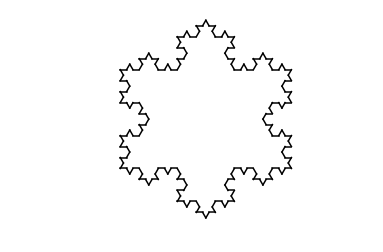

In [13]:
n=iterations.value
fig = plt.figure()
koch_snowflake(n)
plt.axis('equal')
plt.axis('off') 
plt.show()
plt.savefig('Koch_snowflake.png', dpi=300, bbox_inches='tight')

# References

[1] "https://stackoverflow.com/questions/15367165/finding-coordinates-of-koch-curve"


[2] "https://github.com/nature-of-code/noc-examples-processing/blob/master/chp08_fractals/Exercise_8_02_KochSnowFlake/Exercise_8_02_KochSnowFlake.pde"


[3]"https://www.geeksforgeeks.org/koch-curve-koch-snowflake/"


[4]"https://codereview.stackexchange.com/questions/144700/plotting-the-koch-snowflake"